### Problems in Gravitation

In [1]:
import pint

ureg = pint.get_application_registry()
Q_ = ureg.Quantity

#### Problem - Motion of the international space station (ISS) right now
The two lines of Python code below should display a web page with current information about the ISS right now.
You can assume that the ISS moves around Earth in uniform circular motion. Start by executing the two commands below.

>a) Note down the altitude, the speed, and the period of the ISS. (If you cannot get access to the information now, you may use the values
$h=427.63\text{ km}$, $v=7.65\text{ km/s}$, and $T=93\text{ min}$.) As the information is update live you may want to take a screenshot from which you can read of the values. 

>b) Use the value for the altitude to compute the speed of the ISS right now.

>c) Use the value of the altitude and the calculated value of the speed to determine the period of the ISS orbit.

>d) Compare your calculated values to the values you read at the web site.


In [2]:
from IPython.display import IFrame
IFrame(src='https://www.n2yo.com/?s=25544&live=0', width=900, height=800)

In [3]:
import numpy as np
# a)
h = Q_(427.63, 'km') 
v = Q_(7.65, 'km/s')
T = Q_(93, 'minutes')


### b)
We use the formula:
$$
v = \sqrt{\frac{G \cdot m}{A}}
$$


In [4]:
width_earth = Q_(12742, 'km')
A = Q_(421.93, 'km') + (width_earth / 2)
m_earth = Q_(5.972e24, 'kg')
G = Q_(6.67e-11, 'N * m^2 / kg^2')
v_orbit = np.sqrt(G * m_earth / A)
print(f"The velocity at orbit is {v_orbit.to('km/s'):.2f}")

The velocity at orbit is 7.66 kilometer / second


### c)
We use the formula:
$$
v = \frac{2\pi r}{T} \Leftrightarrow T = \frac{2\pi r}{v}
$$

In [5]:
T_cal = (2 * np.pi * A) / v_orbit
print(f"The period of the orbit is {T_cal.to('minutes'):.0f}")

The period of the orbit is 93 minute


### d)
My calculated values are the same if rounded to the same decimals.

#### Problem - Object in elliptic orbit
An object is launched from point A, at the surface of the Earth (blue circle with radius $R$ and mass $M$) and follows the orbit shown below.

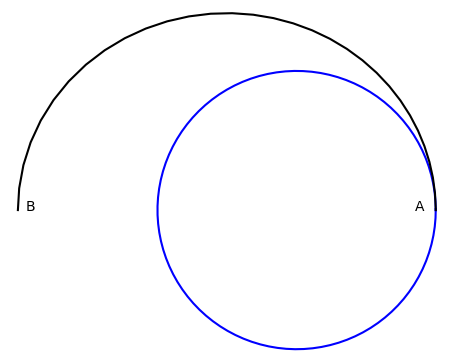

At the launch point the speed is $v_1$; the initial velocity is tangential to the surface of the Earth. 
At the last shown point, point B, the object is at a distance of $3R$ from its launch point.

Ignore air resistance.

>a) Determine the speed $v_2$ at the point B.

To decided the speed $v_2$ we need to analyze the image based on energy conservation where we know that at point A we have the same energy as at point B as we neither lose or add energy
$$
E = K_A + U_A = K_B + U_B
$$
This translates to
$$
\frac{mv_1^2}{2} - \frac{GMm}{r_1} = \frac{mv_2^2}{2} - \frac{GMm}{r_2} 
$$
So we just need to solve this

In [9]:
from sympy import symbols, solve, Eq

G, M, m, v1, v2, r1, r2 = symbols('G M m v1 v2 r1 r2')
eq = Eq((m*v1**2 / 2) - (G*M*m/r1), (m*v2**2 / 2) - (G*M*m/r2))
v2_solution = solve(eq, v2)
print(f"The speed at B can be calculated as {v2_solution[0]}.")

The speed at B can be calculated as -sqrt(2*G*M/r2 - 2*G*M/r1 + v1**2).


####  Problem - Escape velocity for object between two planets
An object with the mass $m$ is launched from between two planet. The escape velocity for the object is called $v_e$.
The situation is shown in the figure below. 

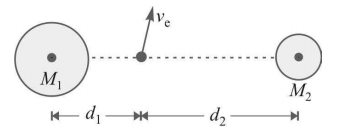

>a) Determine an expression for the escape velocity for the particle starting between the two planets.


We know that we can use the escape condition can be written as
$$
v_{esc} = \sqrt{\frac{2GM}{R}}
$$
But as we have two objects with a gravitational pull we can't just use that equation. Instead we need to use the fact that an object has "escaped" when it can reach an infinite distance away with zero kinetic energy. At this infinite point, its gravitational potential energy is also zero. Therefore, the total energy of an object at escape velocity must be zero.
$$
E = K + U = 0
$$
We can now write this up for our objects and solve

In [19]:
from sympy import latex, symbols, solve, Eq

G, M1, M2, m, v, d1, d2 = symbols('G M1 M2 m v d1 d2')

# We start out by writig U_tot = U1 + U2
U1 = -G * M1 * m / d1
U2 = -G * M2 * m / d2
U_tot = U1 + U2

# The intial kinetic energy of the object is simple as it is just
K = m * v**2 / 2

# We can now solve the equation for the escape velocity
eq = Eq(K + U_tot, 0)
v_solution = solve(eq, v)

print(f"U_tot = {latex(U_tot)}")
print(f"The escape velocity can be calculated as {latex(v_solution[1])}.")

U_tot = - \frac{G M_{1} m}{d_{1}} - \frac{G M_{2} m}{d_{2}}
The escape velocity can be calculated as \sqrt{2} \sqrt{G \left(\frac{M_{1}}{d_{1}} + \frac{M_{2}}{d_{2}}\right)}.


$$
U_{tot} = \frac{G m \left(- M_{1} d_{2} - M_{2} d_{1}\right)}{d_{1} d_{2}}
$$
$$
v_e = \sqrt{2G \left(\frac{M_{1}}{d_{1}} + \frac{M_{2}}{d_{2}}\right)}.
$$

#### Problem - Conservation of energy and angular momentum
A small object (red disc below) is, far from Earth (blue disc below), moving towards the left with speed $v_1$. The orbit of the object is, far away from Earth, 
a straight line (shown as a solid black line), that is located three times the Earth radius above center of the Earth.
As the object approaches Earth its orbit deviates more and more from the straight line (illustrated by the dashed black line), and it ends up colliding with Earth with a speed $v_2$.
The velocity at the point of collision is tangential to the Earth's surface.

>a) Explain why mechanical energy and angular momentum with repect to the centre of the Earth are conserved.

>b) Write down equations expressing conservation mechanical energy and angular momentum.

>c) Solve the equations for the speeds, $v_1$ and $v_2$.

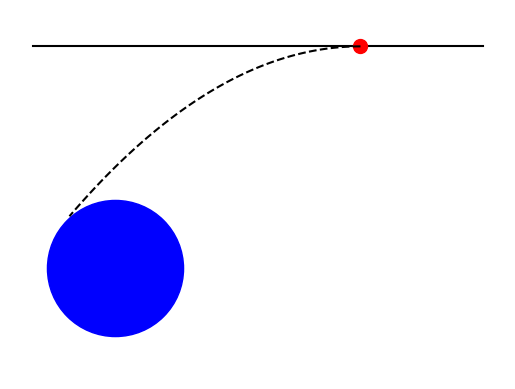

In [6]:
import numpy as np
x = np.linspace(0.12,-0.022,101)
y = 0.06+0*x-2.28*(x-0.12)**2
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0],[0],'bo',markersize=98)
plt.plot([-0.04,0.18],[0.06,0.06],'k-')
plt.plot([0.12],[0.06],'ro',markersize=10)
plt.ylim(-0.03,0.07)
plt.plot(x,y,'k--')
plt.axis('off')
plt.show()

### a)
The total mechanical energy of an object is the sum of its kinetic energy (K) and its gravitational potential energy (U). This total energy is conserved if the only forces doing work on the object are conservative forces. As the only force doing work on the object is the gravity from earth, and that is conservative, it's therefore conserving the mechanical energy.

Angular momentum is conserved if the net external torque ($\tau$) acting on the object, relative to a chosen point, is zero. In this case, the natural point to choose is the center of the Earth. We can then calculate the torque which is defined as $\tau = r \times F$, where r is the position vector from the center of the earth to the object, and F is the force acting on the object. We know that the force F is the gravity and that it will always point towards the center, where r points towards the object from the center of earth. As this is allong the same path the cross product is always zero, therefore the angular momentum stays constant.

### b)
We can analyse the two points:
* $P_1$: The object is "far from Earth" with speed $v_1​$.
* $P_2$: The object collides with Earth's surface with speed $v_2​$.

We know that we conserve all energy, so
$$
E_1 = E_2
$$
The initial energy $E_1$ must be
$$
E_1 = \frac{mv^2}{2}
$$
For the final energy $E_2$ we know that at the surface of the Earth, the distance is $r_2​=R_E$​. The energy is the sum of its kinetic and potential energy:
$$
E_2 = \frac{1}{2}mv_2^2 - \frac{GM_Em}{R_E}
$$
We now have the first equation:
$$
\frac{1}{2}mv_1^2 = \frac{1}{2}mv_2^2 - \frac{GM_Em}{R_E}
$$

Now we can focus on the conservation of angular momentum
$$
L = mvr
$$
where the initial momentum must be
$$
L_1 = mv_1(3R_E)
$$
and the final momentum must be
$$
L_2 = mv_2R_E
$$
giving us
$$
mv_2R_E = mv_1(3R_E)
$$

In [29]:
# c)
G, M_E, m, v_1, v_2, R_E = symbols('G M_E m v_1 v_2 R_E')

eq1 = Eq(1/2 * m * v_1**2, 1/2 * m * v_2**2 - (G * M_E * m / R_E))
eq2 = Eq(m * v_2 * R_E, m * v_1 * (3 * R_E))
v_solution = solve((eq1, eq2), (v_1, v_2))

print(f"The speeds can be calculated as v_1 = {latex(v_solution[1][0])} and v_2 = {latex(v_solution[1][1])}.")

The speeds can be calculated as v_1 = 0.5 \sqrt{\frac{G M_{E}}{R_{E}}} and v_2 = 1.5 \sqrt{\frac{G M_{E}}{R_{E}}}.


$$
v_1 = 0.5 \sqrt{\frac{G M_{E}}{R_{E}}}
$$
$$
v_2 = 1.5 \sqrt{\frac{G M_{E}}{R_{E}}}
$$

#### Problem - Simulation of satellite in motion
The equations of motion for a satellite only influenced by the gravitational force from the Earth in first order form is
$$\frac{dx}{dt}=v_x$$
$$\frac{dy}{dt}=v_y$$
$$m\frac{dv_x}{dt}=-\frac{GMmx}{\left(x^2+y^2\right)^{3/2}}$$
$$m\frac{dv_y}{dt}=-\frac{GMmy}{\left(x^2+y^2\right)^{3/2}}$$

By picking appropriate natural scales, these equations can be brought to the non-dimensionalised form
$$\frac{dX}{dT}=V_X$$
$$\frac{dY}{dT}=V_Y$$
$$\frac{dV_X}{dT}=-\frac{X}{\left(X^2+Y^2\right)^{3/2}}$$
$$\frac{dV_Y}{dT}=-\frac{Y}{\left(X^2+Y^2\right)^{3/2}}$$
The Earth has radius one in the non-dimensionalised form.

We will use the non-dimensionalised form in this problem. 

>a) [Optional] Verify the equations of motion (the dimension version).

>b) Simulate the motion of the satellite with initial conditions $X=2, Y=0, V_X=0, V_Y=1$. Find a suitable time interval, and
plot the orbit together with the Earth. 

>c) What should the initial condition for $V_Y$ be changed to in order for the satellite to escape to infinity?

<details> <summary>Hint 1 for c) click here</summary> You can approach it by trial-and-error and simulate with different initial velocities in the Y-direction.</details>
<details> <summary>Hint 2 for c) click here</summary> If you prefer an analytical approach you may use that the kinetic energy is 1/2*(V_X+V_Y)**2 and
the potential energy is -1/np.sqrt(X**2+Y**2)</details>

To draw the Earth in non-dimensionalized form, you may use
```python
t = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'b-')
```

### Answer
For simplicity we define 
$$
\frac{dV_Y}{dT}=-\frac{Y}{\left(X^2+Y^2\right)^{3/2}} \Leftrightarrow \frac{dV_Y}{dT}=-\frac{Y}{r} \text{ where } r = \left(X^2+Y^2\right)^{3/2}
$$

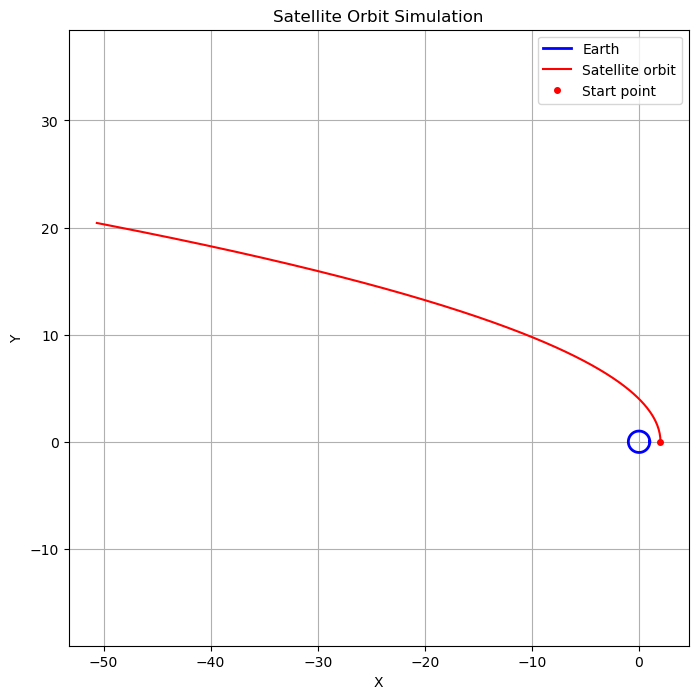

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(T, S):
    """
    S is the state vector [X, Y, VX, VY]
    T is time
    """
    X, Y, VX, VY = S
    r = (X**2 + Y**2)**1.5
    
    dXdT = VX
    dYdT = VY
    dVXdT = -X / r
    dVYdT = -Y / r

    return [dXdT, dYdT, dVXdT, dVYdT]

X = 2; Y = 0; VX = 0; VY = 1
S0 = [X, Y, VX, VY]
T_span = (0, 200)
T_eval = np.linspace(T_span[0], T_span[1], 1000)

sol = solve_ivp(model, T_span, S0, t_eval=T_eval)
plt.figure(figsize=(8,8))
t = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'b-', linewidth=2, label='Earth')
plt.plot(sol.y[0], sol.y[1], 'r-', label='Satellite orbit')
plt.plot(S0[0], S0[1], 'ro', markersize=4, label='Start point')
plt.title('Satellite Orbit Simulation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()



### c) 
To escape, the satellite's total mechanical energy must be greater than or equal to zero ($E \ge 0$).

The non-dimensionalised total energy is the sum of kinetic and potential energy:
$$
E = K + U = \frac{1}{2}(V_X^2 + V_Y^2) - \frac{1}{\sqrt{X^2 + Y^2}}
$$

We apply the initial conditions $X=2, Y=0, V_X=0$ and solve for the minimum $V_Y$ that satisfies $E \ge 0$.


In [45]:
from sympy import sqrt


V_X, V_Y = symbols('V_X V_Y')
E = 1/2 * (V_X**2 + V_Y**2) - 1/(sqrt(X**2 + Y**2))
# We insert the initial value for V_X = 0
E = E.subs({V_X: 0, X: 2, Y: 0})
eq = Eq(E, 0)
v_solution = solve(eq, V_Y)
print(f"The minimum V_Y for escape velocity is {latex(v_solution[1])}.")


The minimum V_Y for escape velocity is 1.0.


So with the given values we would actually escape.